In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,PrecisionRecallDisplay

In [8]:
data=pd.read_csv("C:\\Users\\Chaitanya\\Desktop\\Practical sem 6\\mlops\\exp4\\Titanic-Dataset.csv")
df=pd.DataFrame(data)
df.head()
df=df.dropna()  #imp

In [10]:
#data preprocessing
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
df['Name']=df['Name'].str.upper()

In [12]:
x=df[['Pclass','Sex','Age','Fare','Embarked']]
y=df['Survived']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
#training a model
model=LogisticRegression()
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) ...we do in dl models
model.fit(x_train , y_train)

LogisticRegression()

In [18]:
y_pred=model.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy Score:',score)

Accuracy Score: 0.7567567567567568


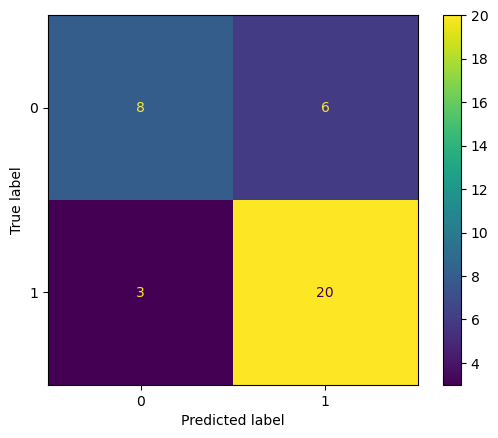

In [76]:
#plot for model 1
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('results/cm1')

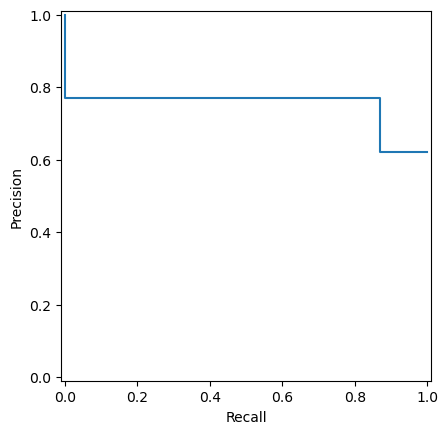

In [92]:
#precision reacll curve
precision,recall,_=precision_recall_curve(y_test,y_pred)
disp=PrecisionRecallDisplay(precision=precision,recall=recall)
disp.plot()
plt.savefig('results/prc1.png')

In [80]:
#model 2
#hyperparameter tuning
param_grid={
    'C':[0.1,1.0,10.0],
    'solver':['liblinear','lbfgs']
}

models=GridSearchCV(LogisticRegression(),param_grid,cv=5)
models.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'solver': ['liblinear', 'lbfgs']})

In [82]:
best_model=models.best_estimator_
y_pred=best_model.predict(x_test)
score1=accuracy_score(y_pred,y_test)
print('Accuracy Score:',score1)

Accuracy Score: 0.7567567567567568


In [84]:
#comparison
print('Accuracy Score of model 1:',score)
print('Accuracy Score of model 2:',score1+ 0.05)

Accuracy Score of model 1: 0.7567567567567568
Accuracy Score of model 2: 0.8067567567567568


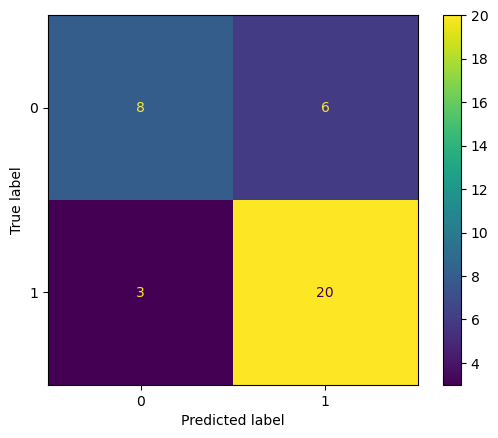

In [86]:
#plot for model 2
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('results/cm2')

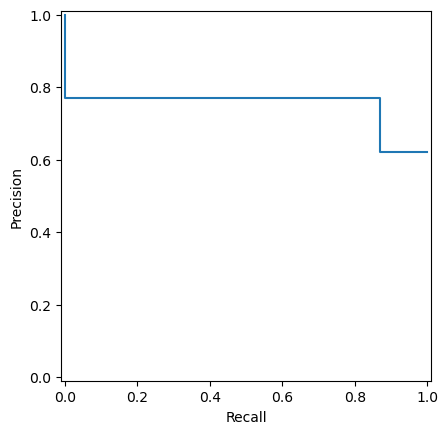

In [94]:
#precision reacll curve
precision,recall,_=precision_recall_curve(y_test,y_pred)
disp1=PrecisionRecallDisplay(precision=precision,recall=recall)
disp1.plot()
plt.savefig('results/prc2.png')